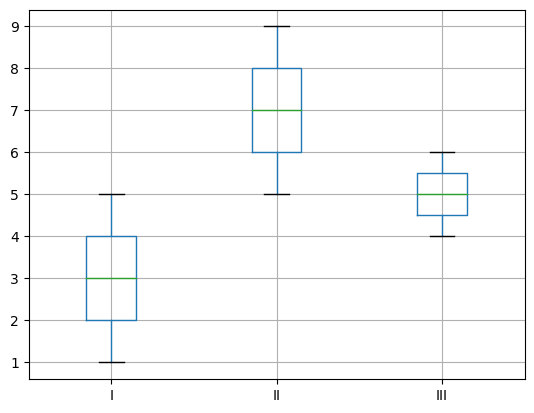

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=3)
data = pd.read_csv('simplest.csv')

data.boxplot(column=['I', 'II', 'III'])
plt.show()

https://www.statology.org/anova-f-value-p-value/

ANOVA 1way
https://www.youtube.com/watch?v=9cnSWads6oo



# ANOVA
Analysis of Variance o Analisis de la Varianza

Es una coleccion de modelos y procedimientos para analizar la varianza entre grupos, se utiliza en diseño de experiemntos y al medir si un efecto es significativo entre varios grupos,

especificamente trataremos con la 1-way ANOVA, la cual es una tabla que se ve asi:
Aqui una imagen de wikipedia:
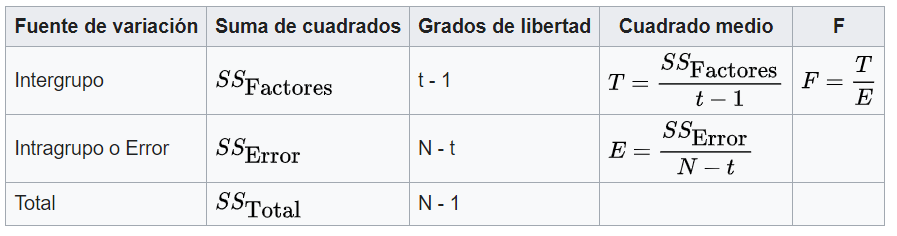

es importante saber que asume:
- que los datos son independientes y no dependen entre si
- que los datos provienen de una distribucion normal
- que los errores de cada grupo poseen igual varianza y se comportan normales

Notacion:
- $X_c^i$ es la muestra $i$ del grupo $c$ 
- $\bar X_c$ es la media del grupo $c$
- $c$ es la cantidad de grupos
- $n_c$ es la cantidad de muestras del grupo c
- $\bar{\bar X}$ es la media de las medias de los grupos


SSE es lo que obtenemos de cada grupo; en algunos lados SSW por within (ingles para dentro del grupo)
$$
\text{SSE} = \sum_{c,i} (X_c^i -\bar{ X_c})^2 = \sum_c \text{SSE}_c
$$


SSF o SSB es el que es entre grupos (between, ingles para entre los grupos) llamado a veces factores.
$$
\text{SSB} = \sum_{c,i} (\bar X_c - \bar{\bar X})^2=\sum_c \text{SSB}_c =\sum_c n_c (\bar X_c - \bar{\bar X})^2 
$$

calculemos estos para una serie de datos

In [7]:
data

,I,II,III
0,1,5,4
1,3,7,5
2,5,9,6


In [17]:
X = data.values # X[i, c] i sample, c grupo

mean_I = data['I'].mean()
mean_II = data['II'].mean()
mean_III = data['III'].mean()
# aqui van todas las medias
X_c = np.array([mean_I, mean_II, mean_III])

TotalMean = np.mean(X_c) # x bar bar

print(X_c)

[3. 7. 5.]


### SSE Sum Squared Errors
Es la diferencia que tiene cada grupo de datos con respecto a la media de grupo,
nos habla de la dispersion dentro de un grupo

In [33]:
SSE_c = np.zeros(len(X_c))

for c in range(len(X_c)):
    print(f"grupo {c+1}")
    for i in range(len(X)):
        print(f"({X[i, c]} - {X_c[c]})**2 = ",(X[i, c] - X_c[c])**2)
        SSE_c[c] += (X[i, c] - X_c[c])**2
    print(f"SSE_{c+1} = ", SSE_c[c])
    
print("Total")
SSE = np.sum(SSE_c)
print("SSE = ", SSE)

grupo 1
(1 - 3.0)**2 =  4.0
(3 - 3.0)**2 =  0.0
(5 - 3.0)**2 =  4.0
SSE_1 =  8.0
grupo 2
(5 - 7.0)**2 =  4.0
(7 - 7.0)**2 =  0.0
(9 - 7.0)**2 =  4.0
SSE_2 =  8.0
grupo 3
(4 - 5.0)**2 =  1.0
(5 - 5.0)**2 =  0.0
(6 - 5.0)**2 =  1.0
SSE_3 =  2.0
Total
SSE =  18.0


In [15]:
# numpy hace lo mismo, suma todas las dimensiones
SSE = np.sum((X - X_c)**2)
print(f"SSE = {SSE}")

SSSE = 18.0


In [35]:
# podemos obtener la varianza como extra:
var = SSE / (len(X_c)*(len(X) - 1))
print(f"Varianza = {var}")

Varianza = 3.0


### SSB Sum Squared Between Groups
Es la diferencia de la media de cada grupo con respecto a la media de todos los grupos

In [37]:
SSB_c = np.zeros(len(X_c))

for c in range(len(X_c)):
    print(f"grupo {c+1}")
    print(f"({X_c[c]} - {TotalMean})**2 = ",(X_c[c] - TotalMean)**2)
    SSB_c[c] += (X_c[c] - TotalMean)**2
    print(f"SSB_{c+1} = ", SSB_c[c])
    
print("Total")
SSB = np.sum(SSB_c)
print("SSB = ", SSB)

grupo 1
(3.0 - 5.0)**2 =  4.0
SSB_1 =  4.0
grupo 2
(7.0 - 5.0)**2 =  4.0
SSB_2 =  4.0
grupo 3
(5.0 - 5.0)**2 =  0.0
SSB_3 =  0.0
Total
SSB =  8.0


In [39]:
SSB = np.sum(( X_c - TotalMean)**2) #numpy way
SSB

8.0

Si obtenemos un puntaje $p$ mayor a $0.05$ quiere decir que no hay evidencia estadistica suficiente para rechazar la hipotesis nula de que las medias de los grupos son iguales. 

En caso de obtener un puntaje menor 

Tukey Test
Bonferroni Test
Scheffe Test